In [3]:
# Dependencies and Setup
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as st
import numpy as np
from scipy.stats import linregress
from scipy import stats
from sklearn import datasets
import matplotlib.cm as cm
from matplotlib.lines import Line2D
import matplotlib
import os

# Import API key
from bz_sql_key import pgAdmin


In [4]:
#-- ## Bonus (Optional)
#-- 1. Import the SQL database into Pandas. (Yes, I could read the CSVs directly in Pandas, but after all, 
#      trying to prove my technical mettle.) 

import psycopg2 
# BZ had to first do "pip install psycopg2" in my Bash base directoy

from sqlalchemy import create_engine
engine = create_engine(pgAdmin)
connection = engine.connect()

titles_data = engine.execute("SELECT * FROM titles")
# print(titles_data)           
title_id = []
title = []
c = 0
for record in titles_data:
    c = c + 1
    title_id.append(record[0])
    title.append(record[1])
# print(f"{c} rows returned")
title_df=pd.DataFrame({"Title_ID": title_id, "Title": title})
title_df


# print("*******************************************************************")
# print("Need to remove  employees limit 100")
# print("*******************************************************************")
employees_data = engine.execute("SELECT * FROM employees")
print(employees_data)                      
emp_no = []
emp_title_id  = []
c = 0
for record in employees_data:
    c = c + 1
    emp_no.append(record[0])
    emp_title_id.append(record[1])
# print(f"{c} rows returned")
employees_df=pd.DataFrame({"Emp_No": emp_no, "Emp_Title_ID": emp_title_id})
employees_df



salaries_data = engine.execute("SELECT * FROM salaries")
print(salaries_data)                      
emp_no = []
salary = []
c = 0
for record in salaries_data:
    c = c + 1
    emp_no.append(record[0])
    salary.append(record[1])
# print(f"{c} rows returned")
# print(f"Salary {salary}")

salaries_df = pd.DataFrame({"Emp_No": emp_no, "Salary": salary})
salaries_df


,Emp_No,Salary
0,10001,60117
1,10002,65828
2,10003,40006
3,10004,40054
4,10005,78228
...,...,...
300019,499995,40000
300020,499996,58058
300021,499997,49597
300022,499998,40000


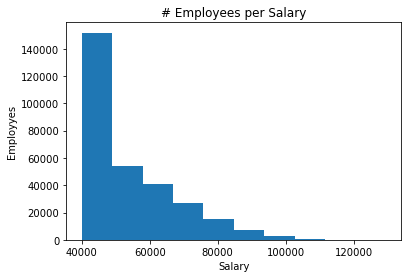

In [5]:
#-- 2. Create a histogram to visualize the most common salary ranges for employees.

# print(salary)
plt.hist(salary)

plt.xlabel("Salary")
plt.ylabel("Employyes")
plt.title("# Employees per Salary")

plt.show()

Text(0.5, 1.0, 'Salary by Title')

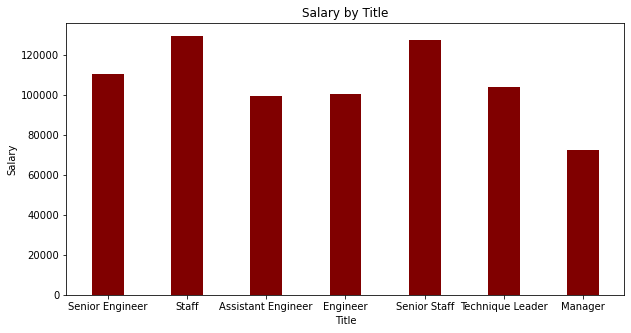

In [6]:
#-- 3. Create a bar chart of average salary by title.

# From #2 above: title_df=pd.DataFrame({"Title_ID": title_id, "Title": title})
# From #2 above: employees_df=pd.DataFrame({"Emp_No": emp_no, "Emp_Title_ID": emp_title_id})
# From #2 above: salaries_df = pd.DataFrame({"Emp_No": emp_no, "Salary": salary})
# print("salaries_df")
# print(salaries_df)
# print(salaries_df[0:2])
# print()

# Merge the two DataFrames together based on the Dates they share
sal_emp_merge_df = pd.merge(salaries_df, employees_df, on="Emp_No")
# print("sal_emp_merge_df")
# print(sal_emp_merge_df)
sal_emp_merge_df = sal_emp_merge_df.rename(columns={"Emp_Title_ID": "Title_ID"})

all_merge_df = pd.merge(sal_emp_merge_df, title_df, on="Title_ID")
# print("all_merge_df")
# print(all_merge_df)

courses = list(all_merge_df["Title"])
# print("courses")
# print(courses)
# print()

values = list(all_merge_df["Salary"])
# print("values")
# print(values)
# print()

fig = plt.figure(figsize = (10, 5))
 
# creating the bar plot
plt.bar(courses, values, color ='maroon',
        width = 0.4)
 
plt.xlabel("Title")
plt.ylabel("Salary")
plt.title("Salary by Title")
